In [1]:
from typing import List
import numpy as np


def calc_flow_latencies(log_path: str, start_callback_name: str, finish_callback_name: str) -> List[float]:
    with open(log_path, 'r') as f:
        lines = f.readlines()

    flow_start_ns_list = []
    flow_finish_ns_list = []
    for line in lines:
        if f'[{start_callback_name}]: Flow start' in line:
            flow_start_ns = int(line.split(" ")[-1])
            flow_start_ns_list.append(flow_start_ns)
        if f'[{finish_callback_name}]: Flow finish' in line:
            flow_finish_ns = int(line.split(" ")[-1])
            flow_finish_ns_list.append(flow_finish_ns)

    if len(flow_start_ns_list) != len(flow_finish_ns_list):
        raise NotImplementedError("Not same length!!!")  # FIXME
    
    flow_latencies_ms = []
    for flow_start_ns, flow_finish_ns in zip(flow_start_ns_list, flow_finish_ns_list):
        flow_latency_ms = (flow_finish_ns - flow_start_ns) * 10 ** (-6)
        flow_latencies_ms.append(flow_latency_ms)
    
    return np.array(flow_latencies_ms)

In [5]:
from typing import Optional
import matplotlib.pyplot as plt

def plot_hist(latencies: List[float], title: Optional[str] = ""):
    plt.hist(latencies, bins=30)
    plt.title(title)
    plt.xlabel("Message flow latency")
    plt.ylabel("Count")
    plt.show()

In [6]:
log_path = "/home/atsushi22/test_log.txt"
start_callback_name = "Timer_callback"
finish_callback_name = "Regular_callback3"

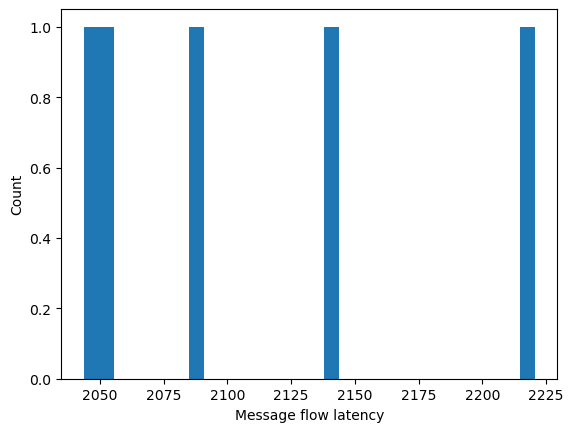

In [7]:
plot_hist(calc_flow_latencies(log_path, start_callback_name, finish_callback_name))